In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user = pd.read_excel('UserDetails.xlsx')
cook = pd.read_excel('CookingSessions.xlsx')
order = pd.read_excel('OrderDetails.xlsx')

In [3]:
user.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [4]:
cook.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [5]:
order.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


### Data merging, cleaning and processing

In [6]:
data = cook.merge(order, on=['Session ID','User ID', 'Dish Name', 'Meal Type'], how = 'left')
data = user.merge(data, on = 'User ID', how = 'left')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            18 non-null     object        
 1   User Name          18 non-null     object        
 2   Age                18 non-null     int64         
 3   Location           18 non-null     object        
 4   Registration Date  18 non-null     datetime64[ns]
 5   Phone              18 non-null     object        
 6   Email              18 non-null     object        
 7   Favorite Meal      18 non-null     object        
 8   Total Orders       18 non-null     int64         
 9   Session ID         16 non-null     object        
 10  Dish Name          16 non-null     object        
 11  Meal Type          16 non-null     object        
 12  Session Start      16 non-null     datetime64[ns]
 13  Session End        16 non-null     datetime64[ns]
 14  Duration (mi

In [8]:
data = data.drop(['Phone','Email'],axis=1)

In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Day'] = data['Order Date'].dt.day.fillna(0).astype(int)
data['Month'] = data['Order Date'].dt.month.fillna(0).astype(int)
data['Year'] = data['Order Date'].dt.year.fillna(0).astype(int)


In [14]:
data['Age Group'] = np.where(data['Age'] < 30, 'Below 30', '30 or Above')

In [16]:
data.head()

,User ID,User Name,Age,Location,Registration Date,Favorite Meal,Total Orders,Session ID,Dish Name,Meal Type,...,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating,Day,Month,Year,Age Group
0,U001,Alice Johnson,28,New York,2023-01-15,Dinner,12,S001,Spaghetti,Dinner,...,1001.0,2024-12-01,Completed,15.0,Night,5.0,1,12,2024,Below 30
1,U001,Alice Johnson,28,New York,2023-01-15,Dinner,12,S004,Pancakes,Breakfast,...,1004.0,2024-12-02,Completed,8.0,Morning,4.0,2,12,2024,Below 30
2,U001,Alice Johnson,28,New York,2023-01-15,Dinner,12,S009,Grilled Chicken,Dinner,...,1009.0,2024-12-05,Completed,12.0,Night,5.0,5,12,2024,Below 30
3,U002,Bob Smith,35,Los Angeles,2023-02-20,Lunch,8,S002,Caesar Salad,Lunch,...,1002.0,2024-12-01,Completed,10.0,Day,4.0,1,12,2024,30 or Above
4,U002,Bob Smith,35,Los Angeles,2023-02-20,Lunch,8,S006,Spaghetti,Dinner,...,1006.0,2024-12-03,Completed,14.0,Night,4.0,3,12,2024,30 or Above


### Popular Dishes

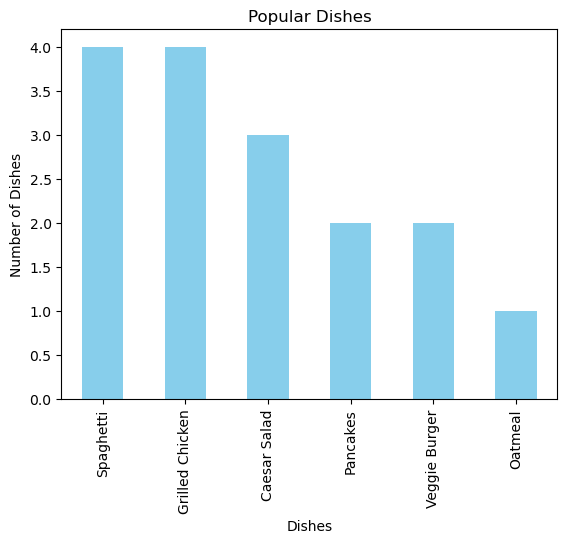

In [17]:
Dishes = data['Dish Name'].value_counts()
Dishes.plot(kind='bar', color='skyblue')
plt.title('Popular Dishes')
plt.xlabel('Dishes')
plt.ylabel('Number of Dishes')
plt.show()

<Figure size 1500x600 with 0 Axes>

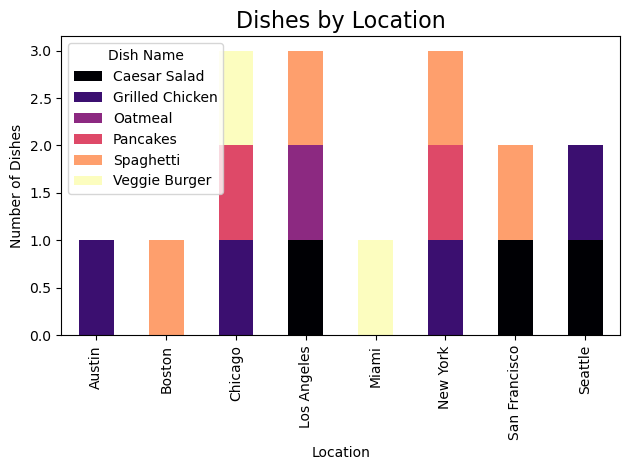

In [18]:
#Popular Dishes by location
d = data.groupby(by=['Location', 'Dish Name']).size().reset_index(name='Dish Count')

d_pivoted = d.pivot(index='Location', columns='Dish Name', values='Dish Count')
plt.figure(figsize=(15,6))
plt.clf()
d_pivoted.plot(kind='bar', stacked=True, colormap='magma')

plt.title('Dishes by Location', fontsize=16)
plt.xlabel('Location') 
plt.ylabel('Number of Dishes')

plt.tight_layout() # Adjusting the layout
plt.show()


In [19]:
pd = data.groupby(by='Dish Name')['Amount (USD)'].sum().reset_index()
pd_sorted = pd.sort_values(by='Amount (USD)', ascending=False)
pd_sorted

,Dish Name,Amount (USD)
4,Spaghetti,55.5
1,Grilled Chicken,51.0
0,Caesar Salad,28.0
5,Veggie Burger,22.0
3,Pancakes,16.5
2,Oatmeal,7.0


### Favorite Meals

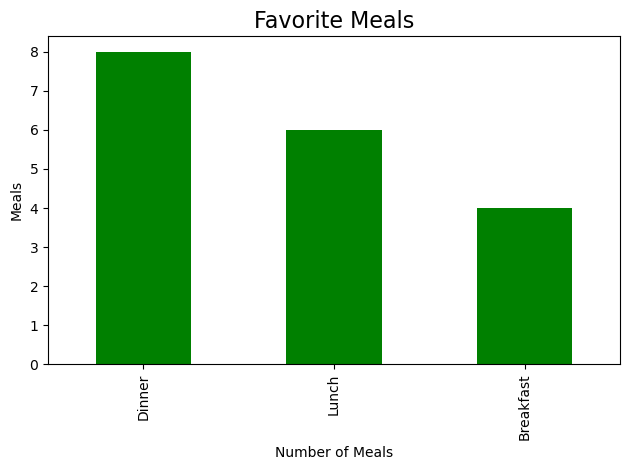

In [20]:
Meals = data['Favorite Meal'].value_counts()

Meals.plot(kind='bar', color='green')
plt.title('Favorite Meals', fontsize=16) 
plt.xlabel('Number of Meals') 
plt.ylabel('Meals')
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

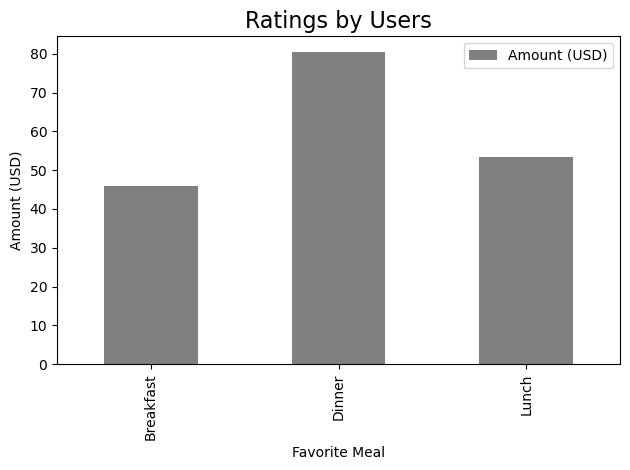

In [21]:
r = data.groupby(by='Favorite Meal')['Amount (USD)'].sum().reset_index()

plt.figure(figsize=(15, 6))
r.plot(kind='bar', x='Favorite Meal', y='Amount (USD)', stacked=False, color = 'Grey')

plt.title('Ratings by Users', fontsize=16)
plt.xlabel('Favorite Meal') 
plt.ylabel('Amount (USD)')


plt.tight_layout()
plt.show()


<Figure size 2000x600 with 0 Axes>

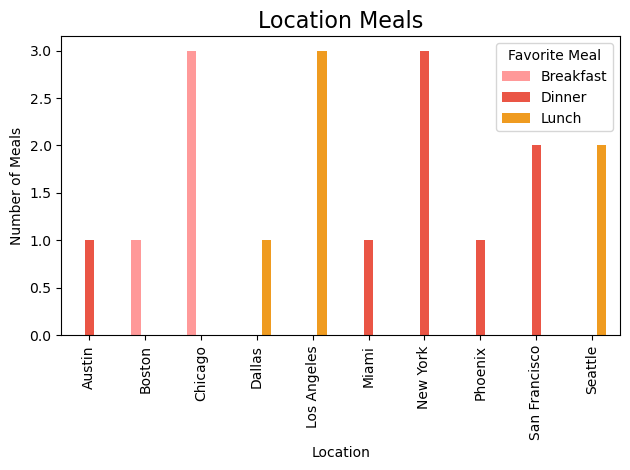

In [22]:
#Location order of Meals
m = data.groupby(by=['Location', 'Favorite Meal']).size().reset_index(name='Meal Count')
plt.figure(figsize=(20, 6))
m.pivot(index='Location', columns='Favorite Meal', values='Meal Count').plot(kind='bar', color=['#ff9999', '#ea5545', '#ef9b20'])

plt.title('Location Meals', fontsize=16)
plt.xlabel('Location') 
plt.ylabel('Number of Meals')

plt.tight_layout()  # Adjusting the layout
plt.show()


In [30]:
#Number of Dishes by Meals
fm = pd.pivot_table(data, index='Favorite Meal', columns='Dish Name', aggfunc='size', fill_value=0)
fm

Dish Name,Caesar Salad,Grilled Chicken,Oatmeal,Pancakes,Spaghetti,Veggie Burger
Favorite Meal,,,,,,
Breakfast,0,1,0,1,1,1
Dinner,1,2,0,1,2,1
Lunch,2,1,1,0,1,0


### Number of Orders

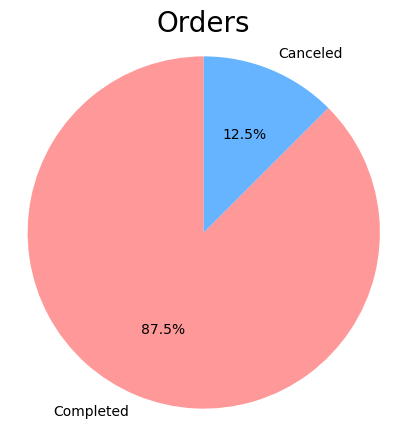

In [31]:
Orders = data['Order Status'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(
    Orders, 
    labels=Orders.index, 
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)
plt.title('Orders', fontsize=20)
plt.axis('equal')
plt.show()

<Figure size 1000x600 with 0 Axes>

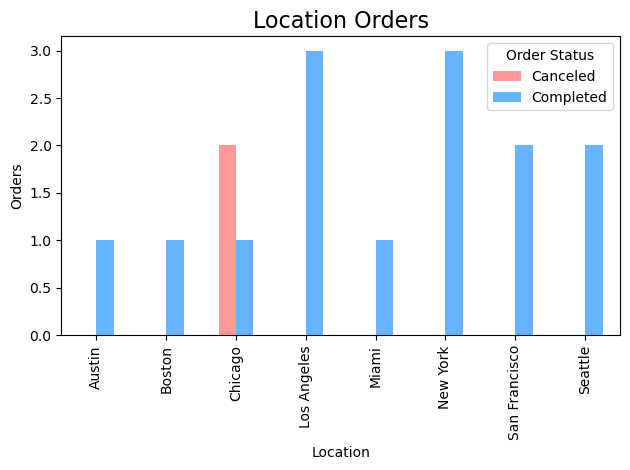

In [32]:
#Location Order that were cancelled and completed

o = data.groupby(by=['Location', 'Order Status']).size().reset_index(name='Order Count')


plt.figure(figsize=(10, 6))

o.pivot(index='Location', columns='Order Status', values='Order Count').plot(kind='bar', color=['#ff9999', '#66b3ff'])

plt.title('Location Orders', fontsize=16)
plt.xlabel('Location') 
plt.ylabel('Orders')

plt.tight_layout()  # Adjusting the layout
plt.show()


### Amount Spent over the days

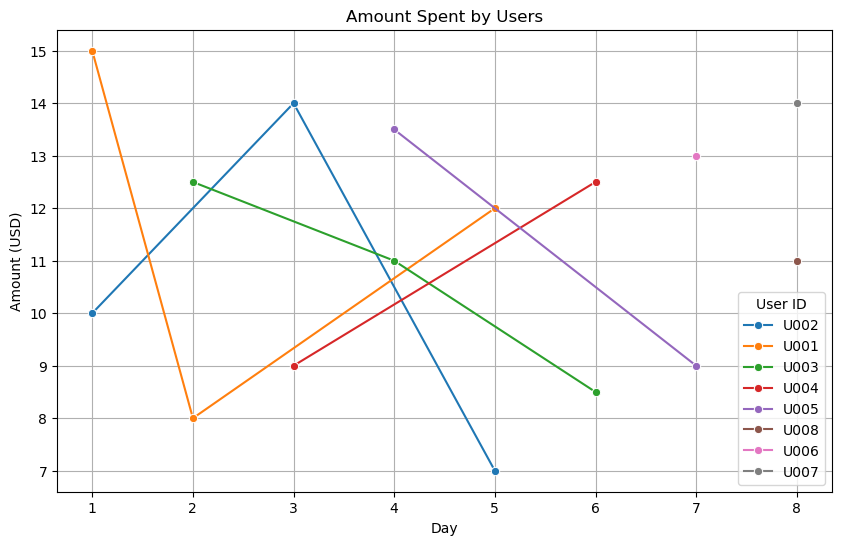

In [33]:
plt.figure(figsize=(10,6))
a = data.groupby(by=['Amount (USD)','User ID'])['Day'].sum().reset_index()
sns.lineplot(data=a, x='Day', y='Amount (USD)', hue='User ID', marker='o')
plt.title("Amount Spent by Users")
plt.grid()
plt.show()

In [34]:
ag = data.groupby('User ID')['Amount (USD)'].sum().reset_index()
ag

,User ID,Amount (USD)
0,U001,35.0
1,U002,31.0
2,U003,32.0
3,U004,21.5
4,U005,22.5
5,U006,13.0
6,U007,14.0
7,U008,11.0
8,U009,0.0
9,U010,0.0


### Total Orders placed over the days

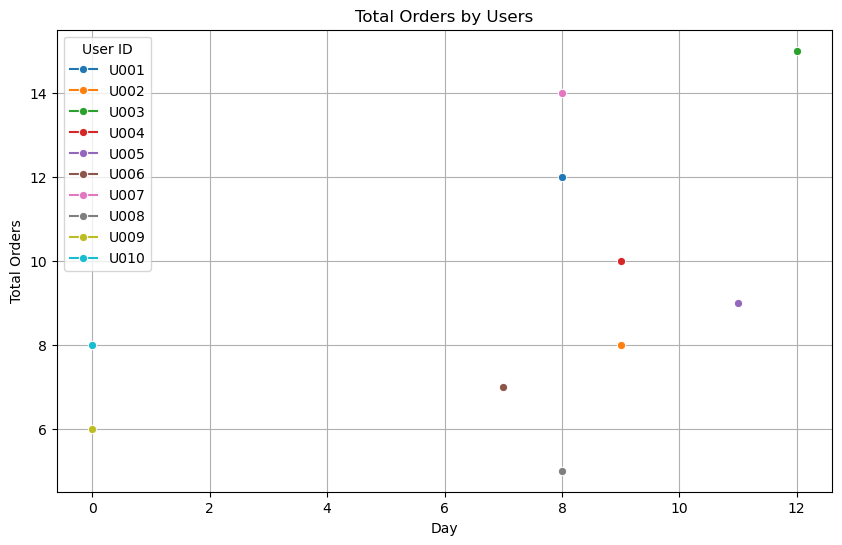

In [35]:
plt.figure(figsize=(10,6))
a = data.groupby(by=['User ID','Total Orders'])['Day'].sum().reset_index()
sns.lineplot(data=a, x='Day', y='Total Orders', hue='User ID', marker='o')
plt.title("Total Orders by Users")
plt.grid()
plt.show()

### Ratings by Dishes, Location and Users

<Figure size 1500x600 with 0 Axes>

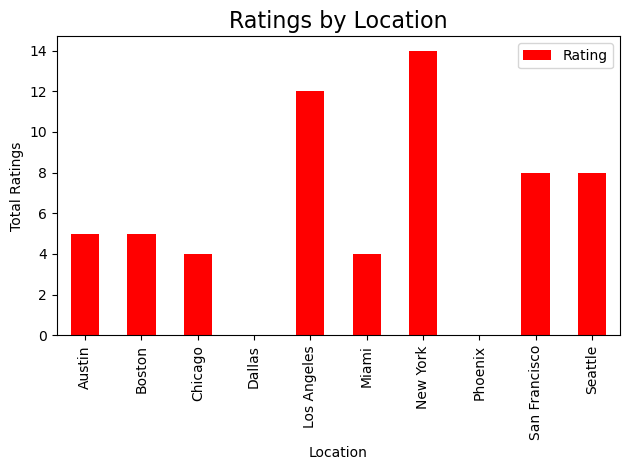

In [36]:
r = data.groupby(by='Location')['Rating'].sum().reset_index()

plt.figure(figsize=(15, 6))
r.plot(kind='bar', x='Location', y='Rating', stacked=False, color='Red')

plt.title('Ratings by Location', fontsize=16)
plt.xlabel('Location') 
plt.ylabel('Total Ratings')


plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

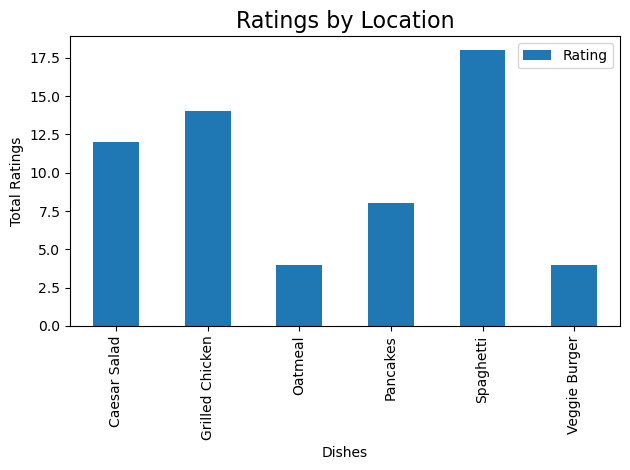

In [37]:
rd = data.groupby(by='Dish Name')['Rating'].sum().reset_index()

plt.figure(figsize=(15, 6))
rd.plot(kind='bar', x='Dish Name', y='Rating', stacked=False)

plt.title('Ratings by Location', fontsize=16)
plt.xlabel('Dishes') 
plt.ylabel('Total Ratings')


plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

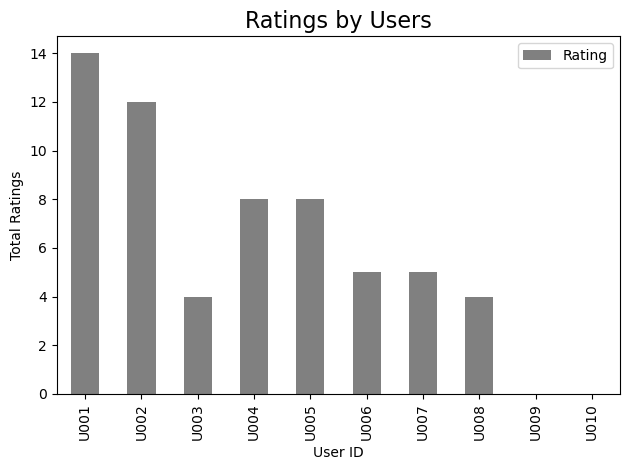

In [38]:
r = data.groupby(by='User ID')['Rating'].sum().reset_index()

plt.figure(figsize=(15, 6))
r.plot(kind='bar', x='User ID', y='Rating', stacked=False, color = 'Grey')

plt.title('Ratings by Users', fontsize=16)
plt.xlabel('User ID') 
plt.ylabel('Total Ratings')


plt.tight_layout()
plt.show()


### Age Groups and Locations

In [39]:
ag = data[['User ID', 'Age Group','Location']].drop_duplicates()
ag

,User ID,Age Group,Location
0,U001,Below 30,New York
3,U002,30 or Above,Los Angeles
6,U003,30 or Above,Chicago
9,U004,Below 30,San Francisco
11,U005,30 or Above,Seattle
13,U006,Below 30,Austin
14,U007,30 or Above,Boston
15,U008,30 or Above,Miami
16,U009,30 or Above,Dallas
17,U010,Below 30,Phoenix


### Cooking duration for the meals

In [40]:
cd = data.groupby(by='Meal Type')['Duration (mins)'].sum().reset_index()
cd

,Meal Type,Duration (mins)
0,Breakfast,70.0
1,Dinner,310.0
2,Lunch,105.0


### Insights